In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
route = './data/HISTORICO_SUERTES.xlsx'
df = pd.read_excel(route)

In [3]:
df_clean = df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21027 entries, 0 to 21026
Data columns (total 85 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Período                    21027 non-null  int64         
 1   Hacienda                   21027 non-null  int64         
 2   Nombre                     21027 non-null  object        
 3   Zona                       21027 non-null  object        
 4   Tenencia                   21026 non-null  float64       
 5   Suerte                     21027 non-null  object        
 6   Suelo                      17269 non-null  object        
 7   Area Neta                  21027 non-null  float64       
 8   Dist Km                    21022 non-null  float64       
 9   Variedad                   21027 non-null  object        
 10  Cod.Estado #               21027 non-null  int64         
 11  Cod.Estado                 21027 non-null  object        
 12  F.Si

In [4]:
df.head(3)

Período  Hacienda           Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493        LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284  UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203    EL AMPARO SAA  IP05      31.0    007  CORINTIAS    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN                   NaN                       NaN   
1                     NaN                   NaN                       NaN   
2                     NaN                   NaN                       NaN   

  Radicion Solar 0-3  Radiacion Solar Ciclo Precipitacion 0_3  \
0                NaN                    NaN               NaN   
1                NaN                    NaN               NaN   
2                NaN                    NaN               NaN   

   Precipitacion Ciclo  Evaporacion 0-3 Evaporacion Ciclo  
0                  NaN              NaN               NaN  
1                  NaN              NaN               NaN  
2                  NaN              NaN               NaN  

[3 rows x 85 columns]

## **EDA y Regresión para TCH**

#### **Análisis de variables numéricas y categoricas**

In [5]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
print(NUMERICAL_FEATURES)

Index(['Período', 'Hacienda', 'Tenencia', 'Area Neta', 'Dist Km',
       'Cod.Estado #', 'Edad Ult Cos', 'Destino 1=Semilla', 'Cod. T.Cultivo',
       'Dosis Madurante', 'Semanas mad.', 'TonUltCorte', 'TCH', 'TCHM',
       'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha',
       'Edad.Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM',
       '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix',
       'Pureza', 'Vejez', 'Num.Riegos', 'M3 Riego', 'DDUlt.Riego',
       'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3',
       'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC',
       '%Infest.Diatrea', 'Fosfato Jugo', 'Fert.Nitrogen.', 'Urea 46%', 'MEZ',
       'Boro Granul.', 'MicroZinc', 'NITO_XTEND', 'Sul.Amonio', 'NITRAX-S',
       'Vinaza', 'Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo',
       'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo',
       'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ci

In [6]:
CATEGORICAL_FEATURES = df.select_dtypes(include=["object", "category"]).columns
print(CATEGORICAL_FEATURES)

Index(['Nombre', 'Zona', 'Suerte', 'Suelo', 'Variedad', 'Cod.Estado', 'D.S.',
       'Cultivo', 'Producto', 'Tipo Quema', 'T.Corte', 'Cerca de', 'Cosechó',
       'Codigo Estacion'],
      dtype='object')


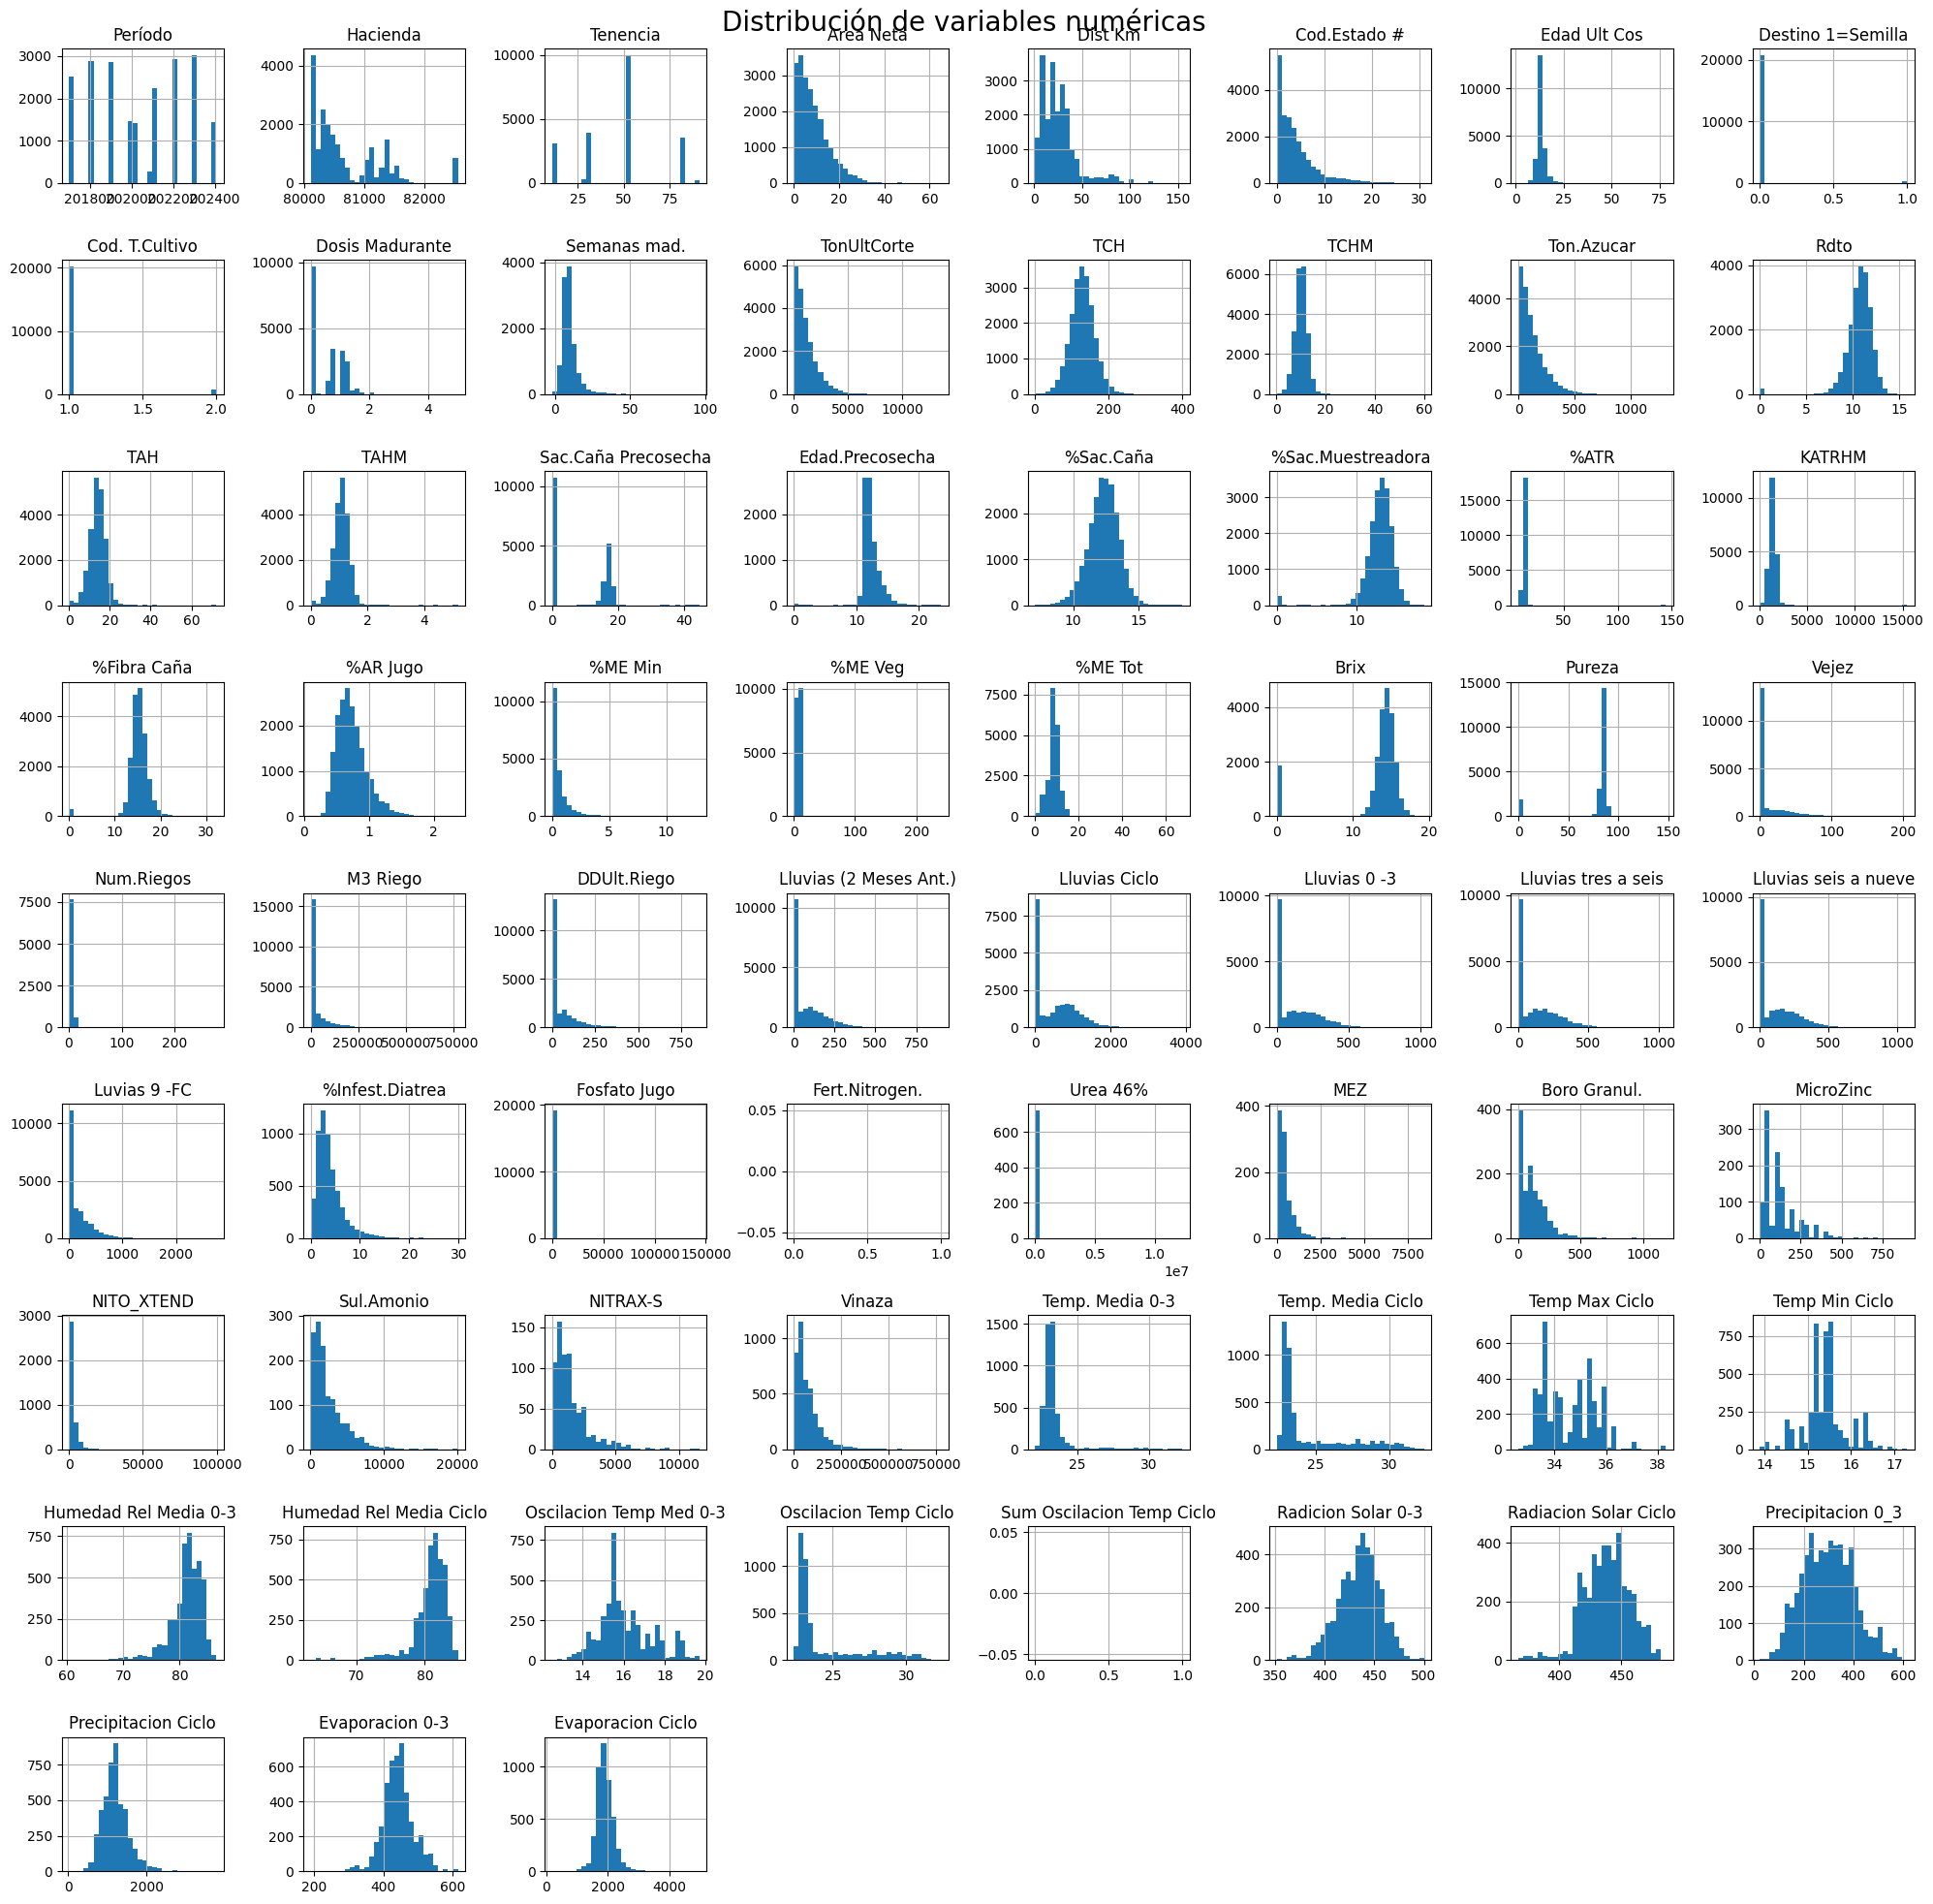

In [7]:
df[NUMERICAL_FEATURES].hist(
    bins=30,
    figsize=(20, 20),   
)
plt.suptitle("Distribución de variables numéricas", fontsize=20)
plt.tight_layout()
plt.show()

---
### **Limpieza: Identificadores** 

Limpieza de variables como `Periodo`, `Hacienda`, `Nombre`, `Suerte`, `Cod.Estado`, `F.Siembra` debido a posible data leakage o variables que no aportan prediccion porque pueden hacer las veces de identificadores más que de predictores. 

In [ ]:
REDUNDANT_FEATURES = ['Período', 'Hacienda', 'Nombre', 'Suelo',  'Suerte', 'Cod.Estado', 'F.Siembra', 'Ult.Riego', 'Cerca de', 'Tenencia']
df = df.drop(columns = REDUNDANT_FEATURES)

---
### **Matrices de Correlación**  
Matrices de correlación orientadas a TCH y %Sac.Caña, al igual que matriz de correlación general

In [9]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns

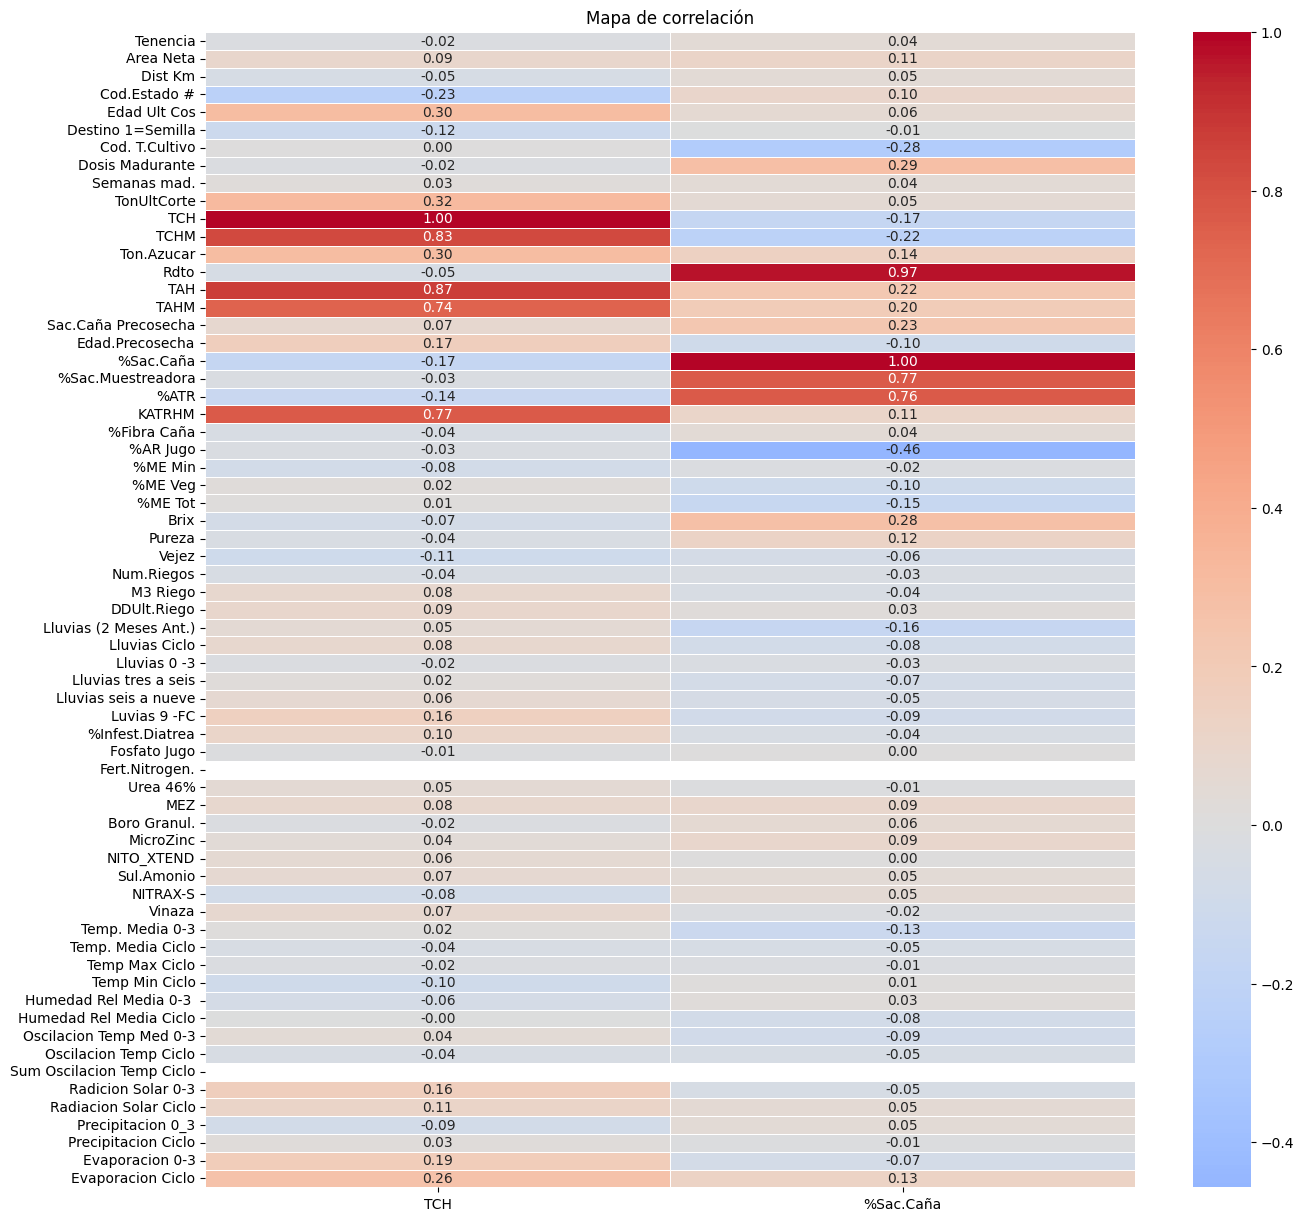

In [10]:
plt.figure(figsize=(15,15))
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
sns.heatmap(numerical_corr[["TCH", "%Sac.Caña"]], 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

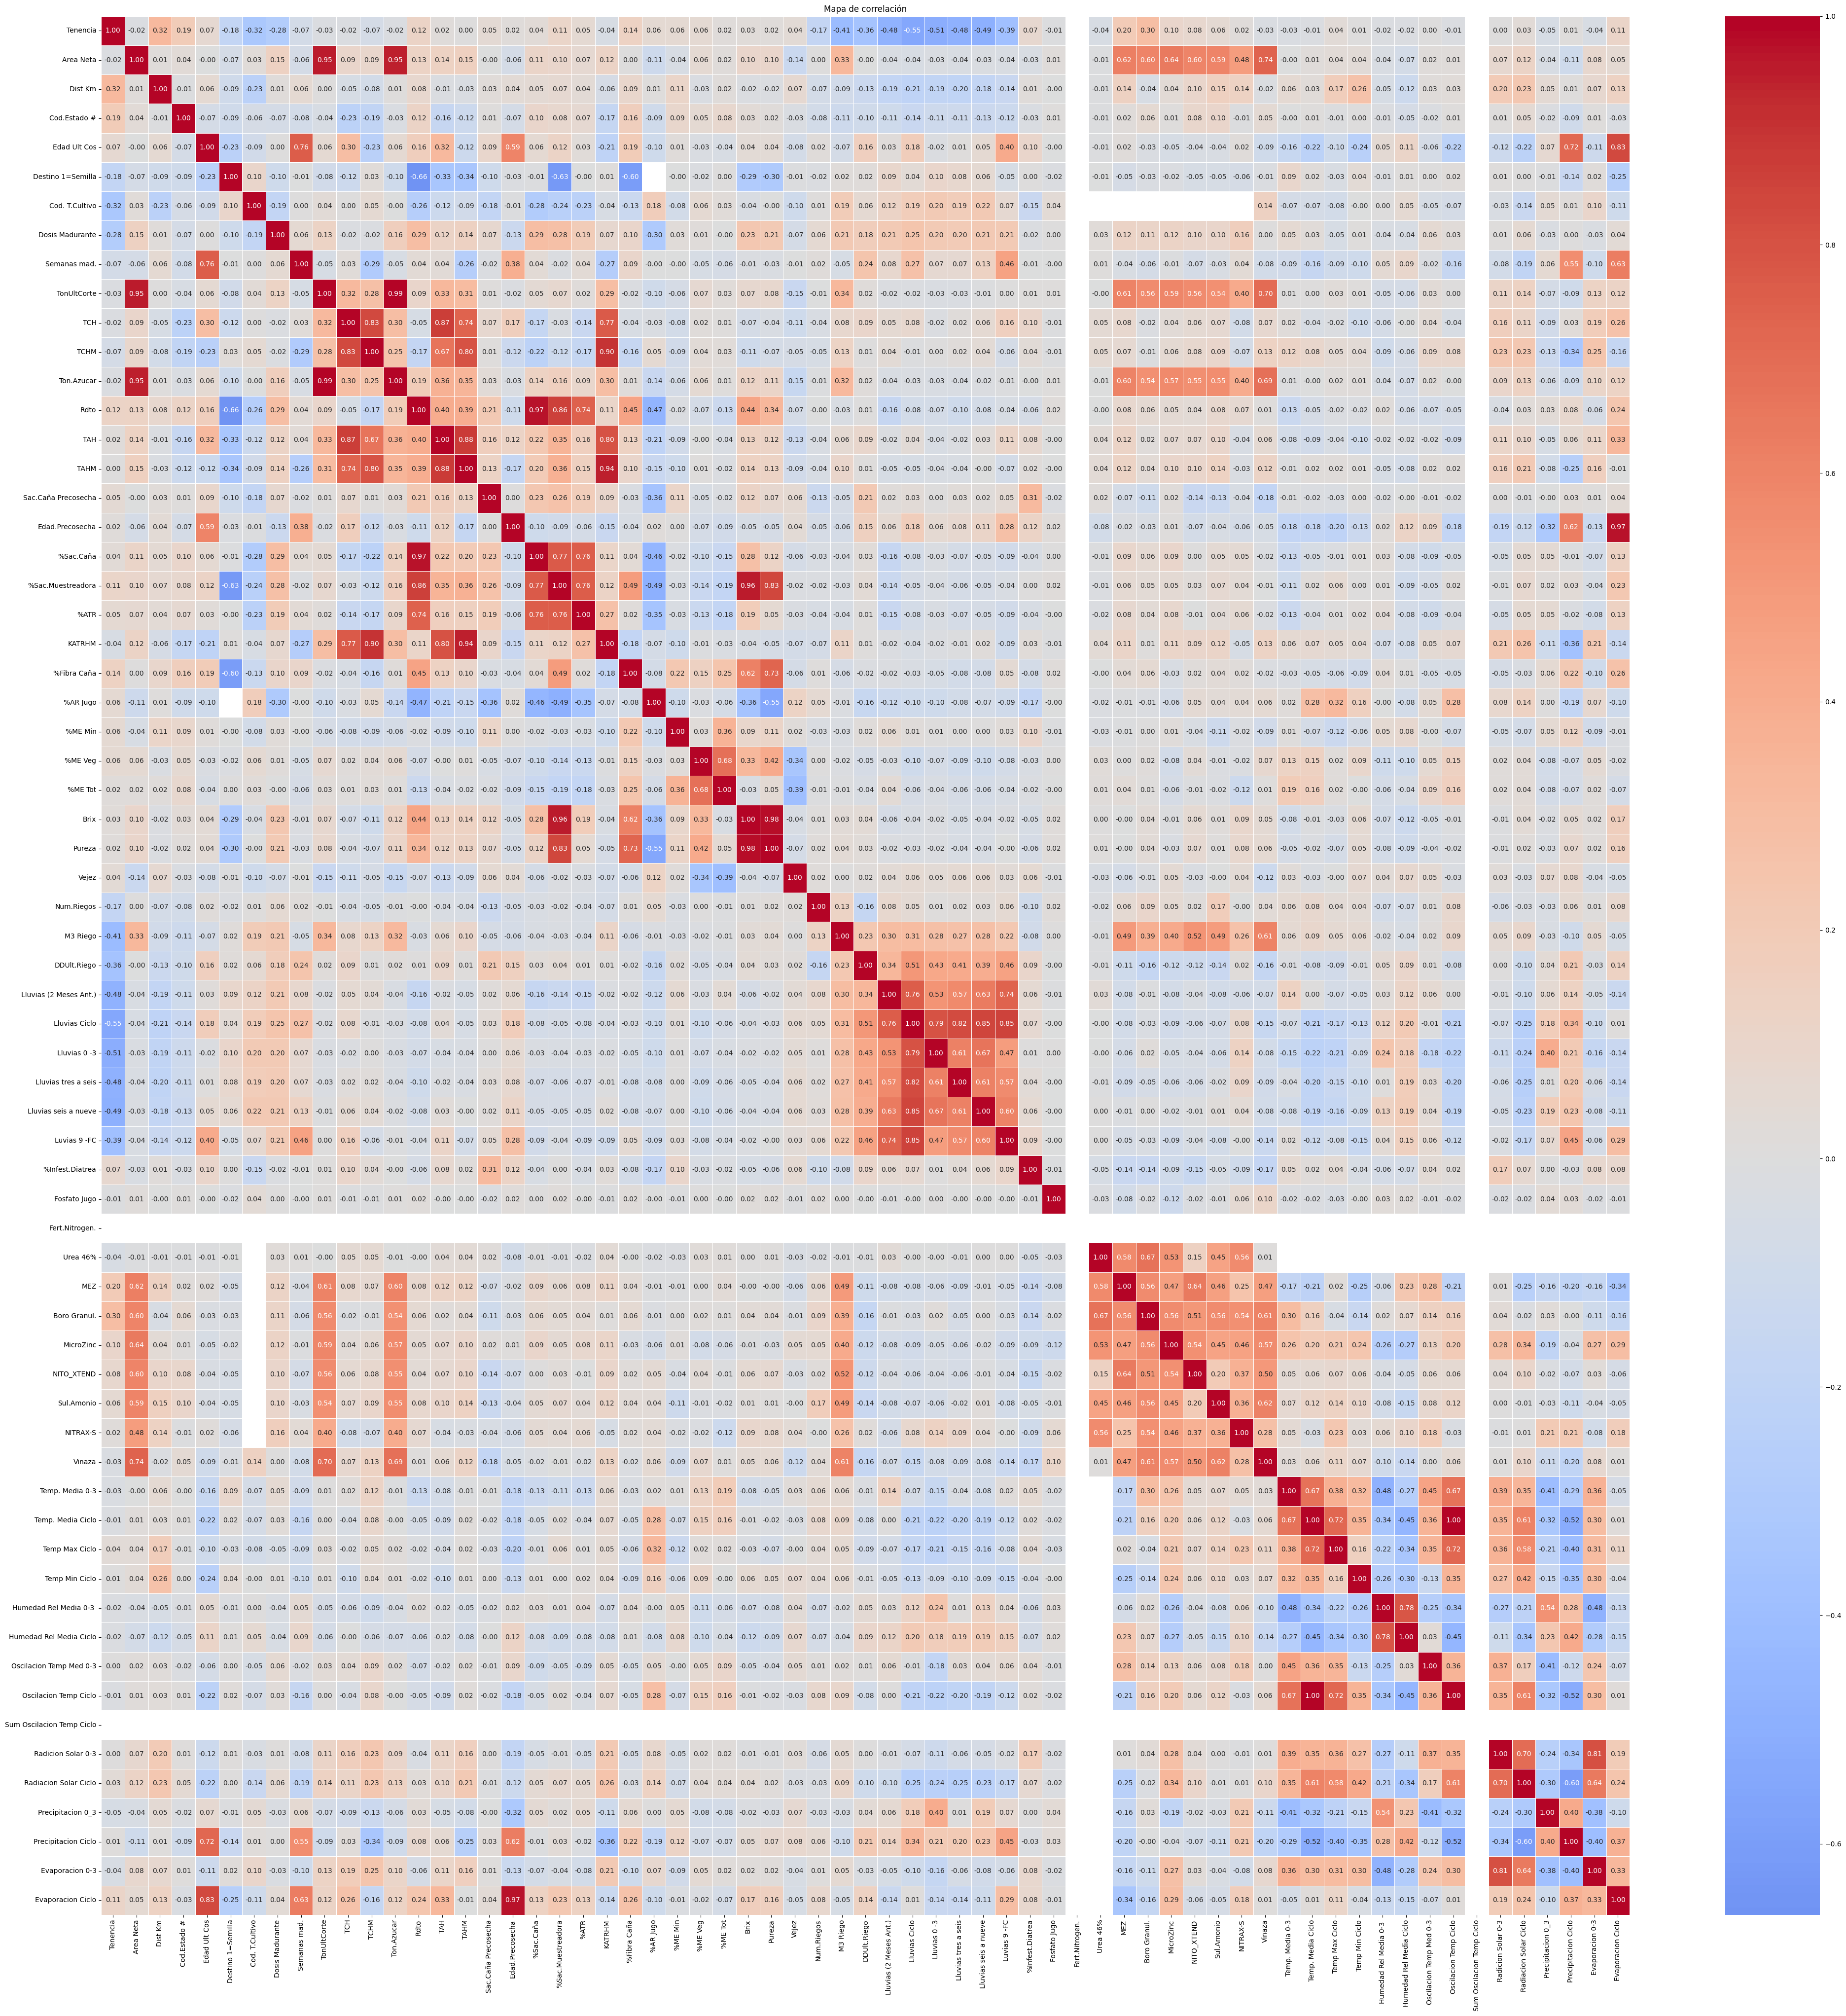

In [11]:
plt.figure(figsize=(50,50))
sns.heatmap(numerical_corr, 
            annot=True,     
            cmap="coolwarm", 
            center=0,      
            fmt=".2f",
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

Se observa multicolinealidad entre algunas variables al igual que altas correlaciones entre variable objetivo y posibles leaks. 

---
### **Limpieza: Leakage para TCH**
Se eliminan variables que se obtienen despues de la cosecha de la caña y que no influyen en la predicción de TCH. 

In [12]:
TCH_LEAKAGE = ['TonUltCorte', 'Ton.Azucar', 'Rdto', 'TAH', 'TAHM', 'Sac.Caña Precosecha', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', 'KATRHM', '%Fibra Caña', '%AR Jugo', '%ME Min', '%ME Veg', '%ME Tot', 'Brix', 'Pureza', 'TCHM']

df = df.drop(columns = TCH_LEAKAGE)

---
### **Limpieza: Variables de Riego**  
Se revisan features relacionadas con riego para eliminar multicolinealidad

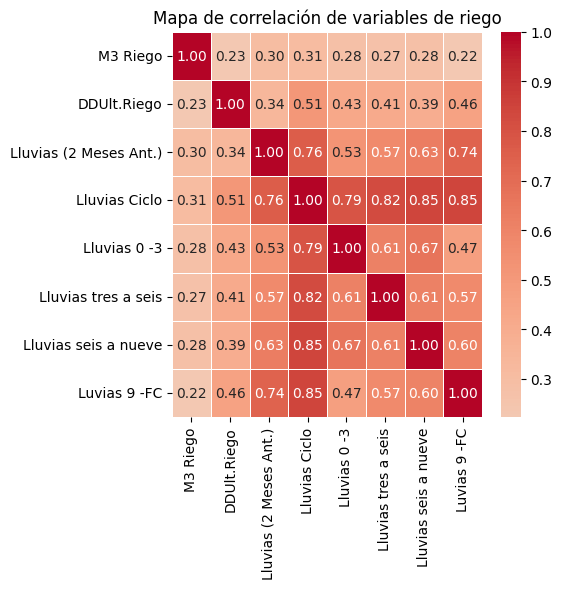

In [13]:
IRRIGATION_FEATURES = ['M3 Riego', 'DDUlt.Riego', 'Lluvias (2 Meses Ant.)', 'Lluvias Ciclo', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']

plt.figure(figsize=(5,5))
numerical_irrig_df = df[IRRIGATION_FEATURES]
irrig_corr = numerical_irrig_df.corr()
sns.heatmap(irrig_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables de riego")
plt.show()

In [15]:
IRRIGATION_DEPURE = ['Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC']
IRRIGATION_FEATURES = [f for f in IRRIGATION_FEATURES if f not in IRRIGATION_DEPURE]
df = df.drop(columns = IRRIGATION_DEPURE)
df[IRRIGATION_FEATURES]

KeyError: "['Lluvias (2 Meses Ant.)', 'Lluvias 0 -3', 'Lluvias tres a seis', 'Lluvias seis a nueve', 'Luvias 9 -FC'] not found in axis"

---
### **Limpieza: Variables del clima**  
Se revisan variables relacionadas del clima por si existe alguna multicolinealidad entre las mismas

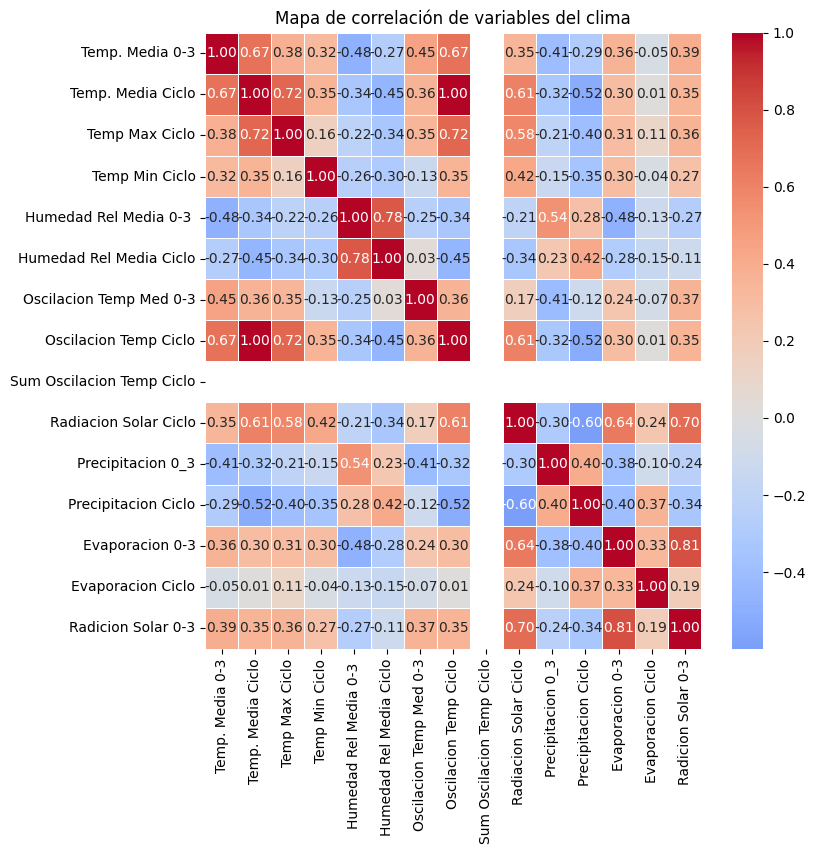

In [17]:
WEATHERING_FEATURES = ['Temp. Media 0-3', 'Temp. Media Ciclo', 'Temp Max Ciclo', 'Temp Min Ciclo', 'Humedad Rel Media 0-3 ', 'Humedad Rel Media Ciclo', 'Oscilacion Temp Med 0-3', 'Oscilacion Temp Ciclo', 'Sum Oscilacion Temp Ciclo', 'Radiacion Solar Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Evaporacion Ciclo', 'Radicion Solar 0-3']

plt.figure(figsize=(8,8))
numerical_weathering_df = df[WEATHERING_FEATURES]
weathering_corr = numerical_weathering_df.corr()
sns.heatmap(weathering_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación de variables del clima")
plt.show()



In [24]:
WEATHERING_DEPURE = ['Temp. Media 0-3', 'Humedad Rel Media 0-3 ', 'Oscilacion Temp Med 0-3', 'Sum Oscilacion Temp Ciclo', 'Precipitacion 0_3', 'Precipitacion Ciclo', 'Evaporacion 0-3', 'Radicion Solar 0-3']
WEATHERING_FEATURES = [f for f in WEATHERING_FEATURES if f not in WEATHERING_DEPURE]
df = df.drop(columns = WEATHERING_DEPURE)
df[WEATHERING_FEATURES]

Temp. Media Ciclo  Temp Max Ciclo  Temp Min Ciclo  \
0                    NaN             NaN             NaN   
1                    NaN             NaN             NaN   
2                    NaN             NaN             NaN   
3                    NaN             NaN             NaN   
4                    NaN             NaN             NaN   
...                  ...             ...             ...   
21022             31.089            35.4            16.6   
21023             30.945            35.4            16.6   
21024             30.945            35.4            16.6   
21025             31.040            35.4            16.6   
21026             30.890            35.4            16.6   

       Humedad Rel Media Ciclo  Oscilacion Temp Ciclo  Radiacion Solar Ciclo  \
0                          NaN                    NaN                    NaN   
1                          NaN                    NaN                    NaN   
2                          NaN                    NaN                    NaN   
3                          NaN                    NaN                    NaN   
4                          NaN                    NaN                    NaN   
...                        ...                    ...                    ...   
21022                   78.797                 31.089                444.382   
21023                   78.704                 30.945                444.528   
21024                   78.704                 30.945                444.528   
21025                   78.720                 31.040                444.839   
21026                   78.687                 30.890                444.372   

       Evaporacion Ciclo  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
...                  ...  
21022             1824.6  
21023             1867.2  
21024             1867.2  
21025             1843.9  
21026             1881.2  

[21027 rows x 7 columns]

---
### **Distribucion Final**

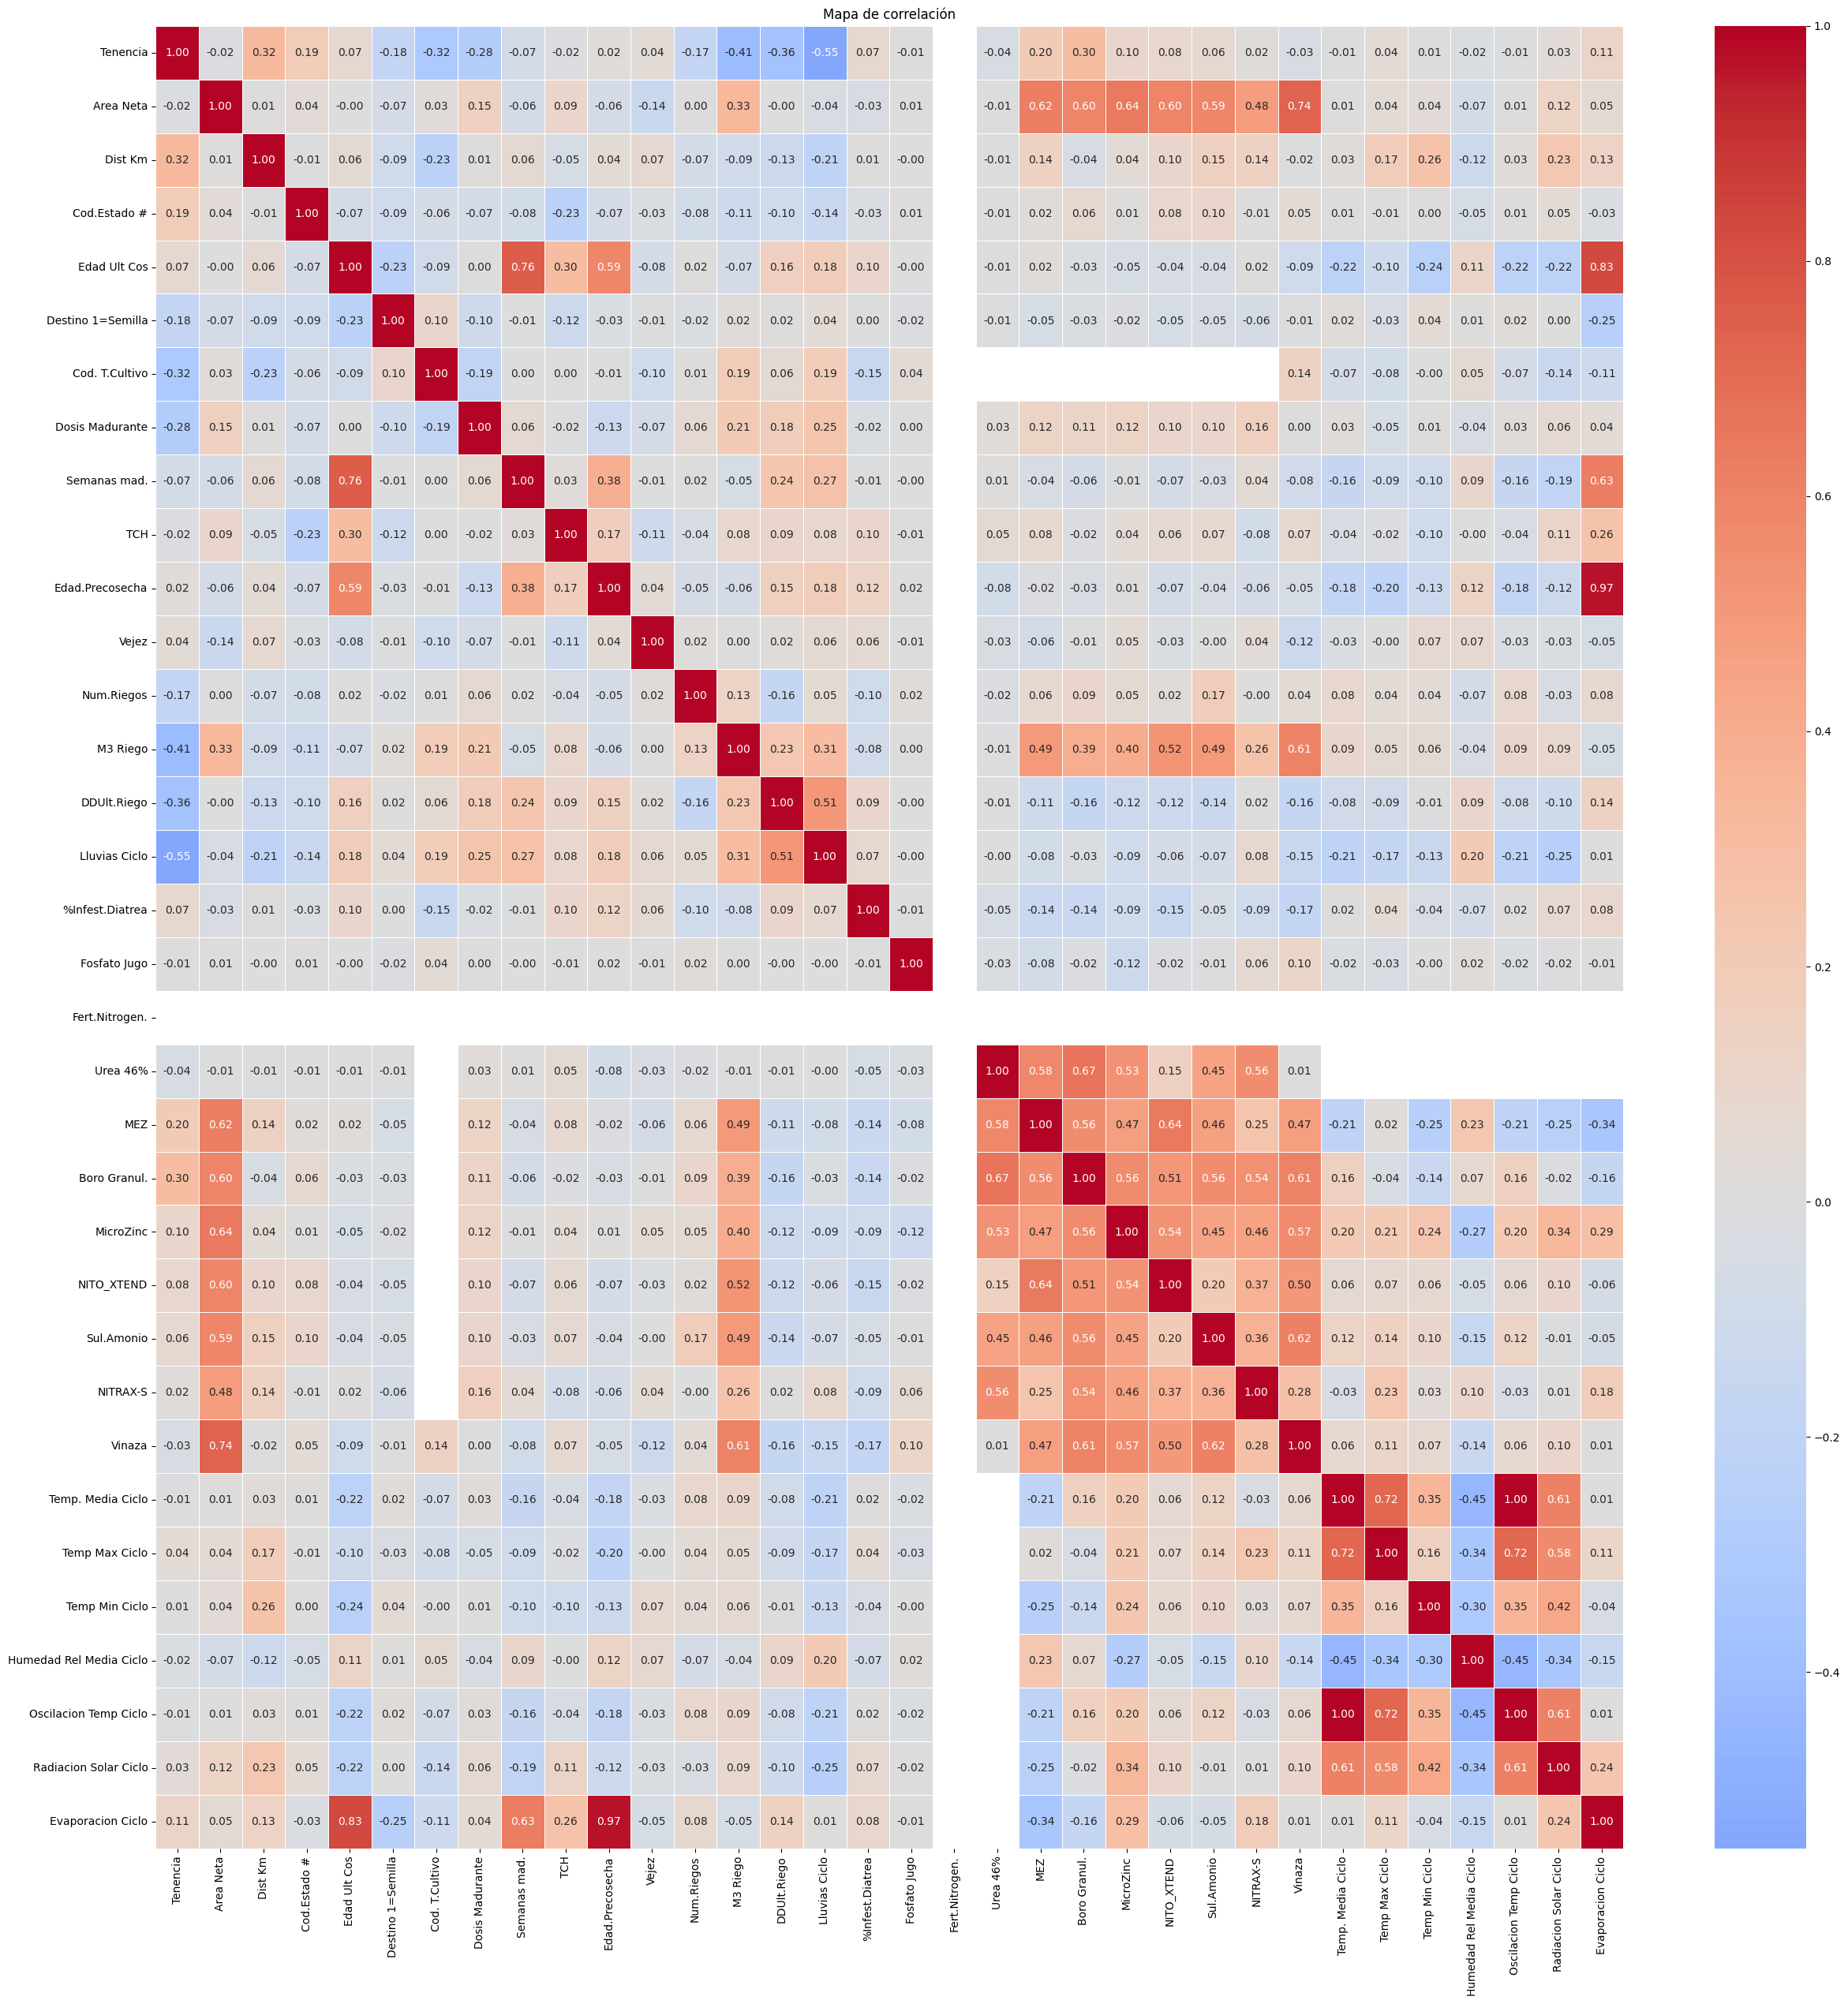

In [35]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns
numerical_df = df[NUMERICAL_FEATURES]
numerical_corr = numerical_df.corr()
plt.figure(figsize=(30,30))
sns.heatmap(numerical_corr, 
            annot=True,
            cmap="coolwarm", 
            center=0,        
            fmt=".2f",       
            linewidths=0.5)  

plt.title("Mapa de correlación")
plt.show()

---
### **Distribución de TCH**

In [25]:
df['TCH'].describe()

count    21027.000000
mean       129.608509
std         32.846029
min          1.573653
25%        108.691426
50%        129.479600
75%        150.407607
max        401.045947
Name: TCH, dtype: float64

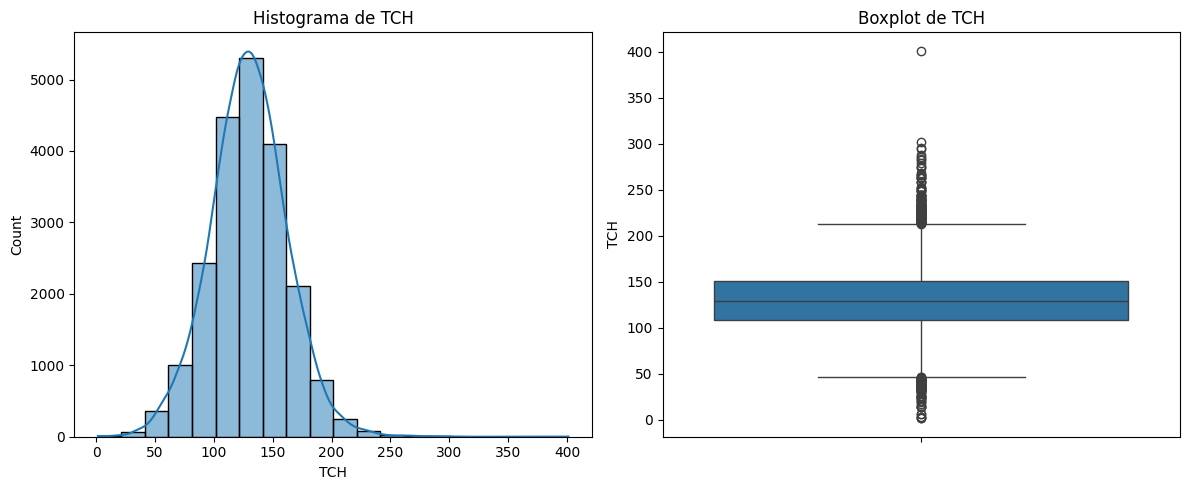

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['TCH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histograma de TCH")

sns.boxplot(y=df['TCH'], ax=axes[1])
axes[1].set_title("Boxplot de TCH")

plt.tight_layout()
plt.show()

In [38]:
Q1 = df['TCH'].quantile(0.25)
Q3 = df['TCH'].quantile(0.75)
IQR = Q3 - Q1

# Límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar
df_filtered = df[
    (df['TCH'] >= limite_inferior) & 
    (df['TCH'] <= limite_superior)
]

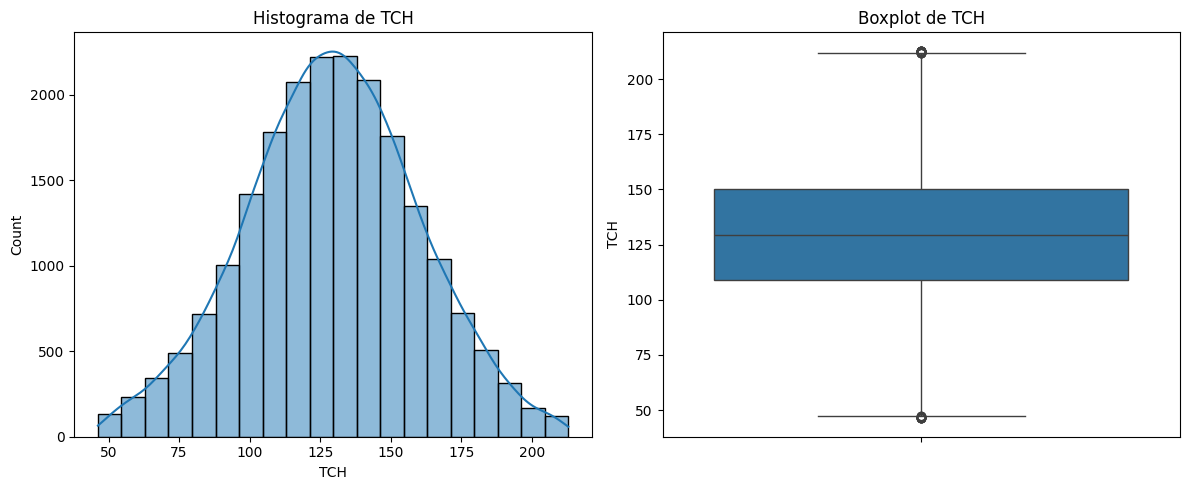

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df_filtered['TCH'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histograma de TCH")

sns.boxplot(y=df_filtered['TCH'], ax=axes[1])
axes[1].set_title("Boxplot de TCH")

plt.tight_layout()
plt.show()

In [41]:
df_filtered.shape

(20723, 45)

### **Gráficos de Dispersión respecto a TCH**

c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\JulianAndresSalamanc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


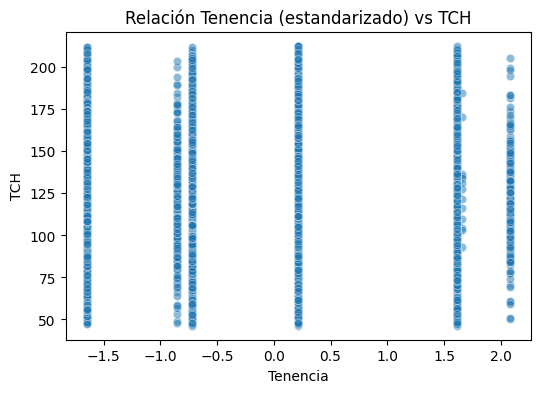

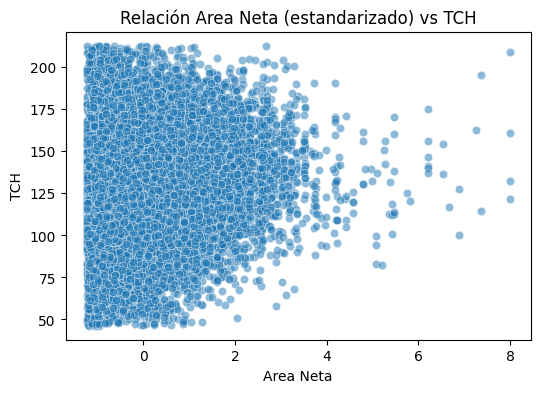

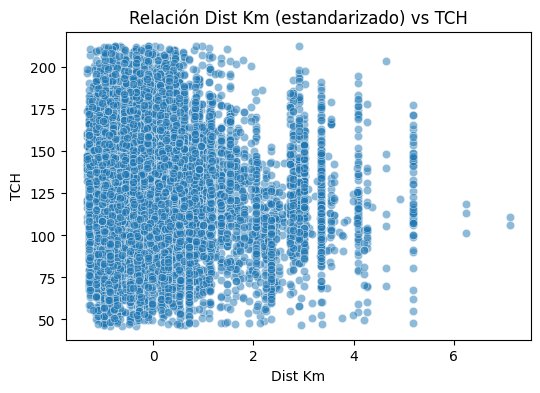

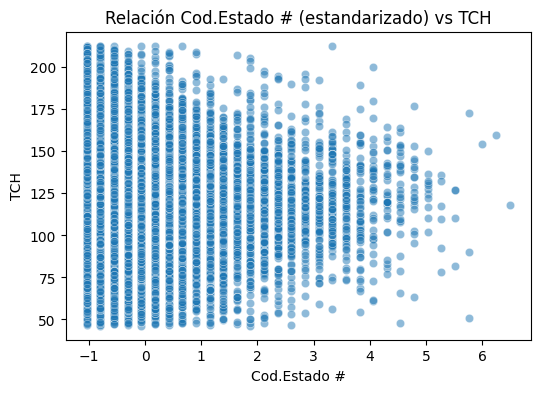

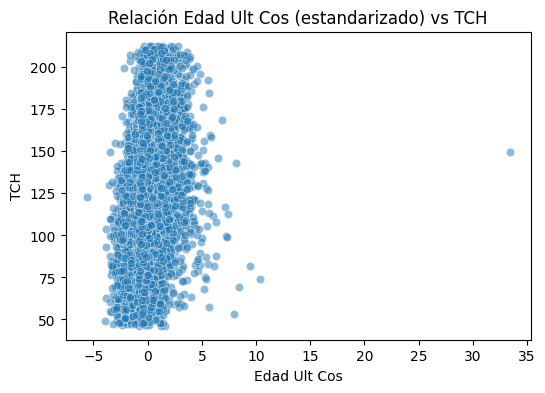

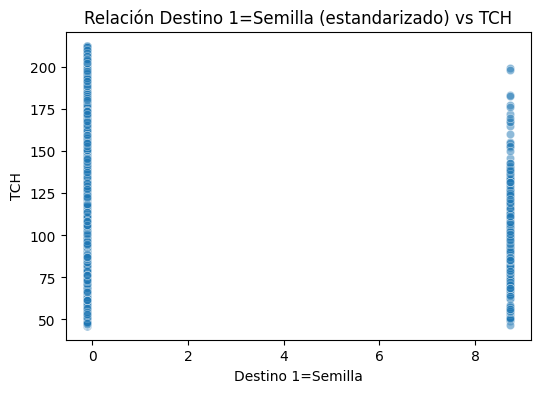

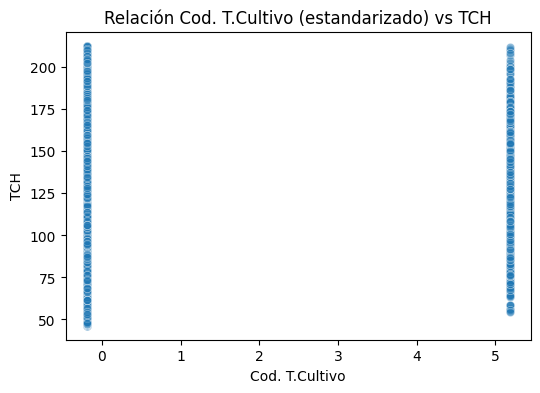

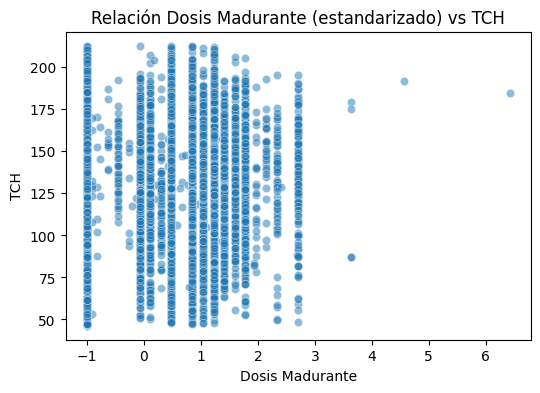

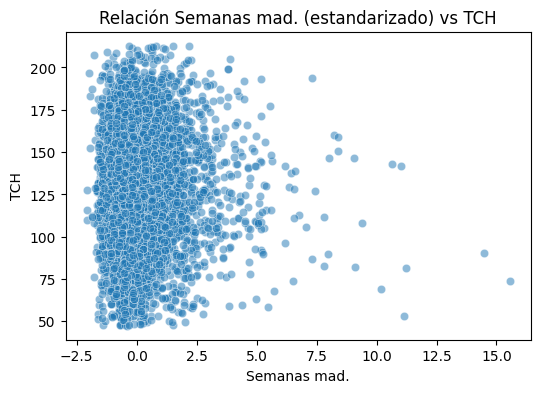

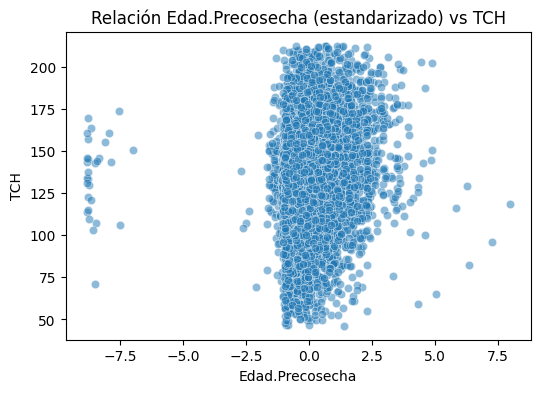

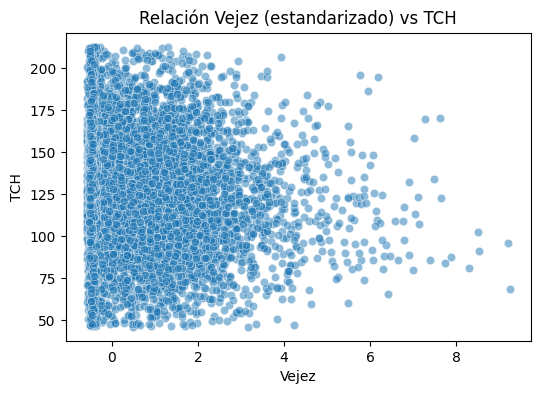

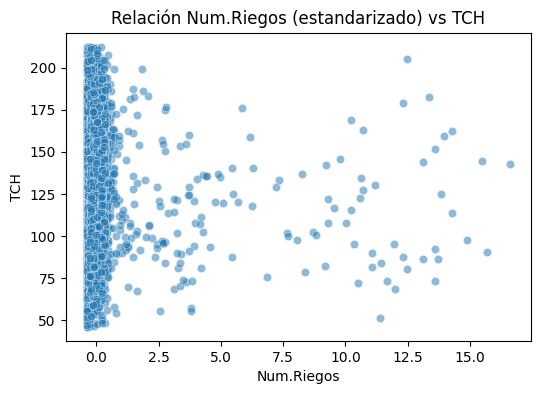

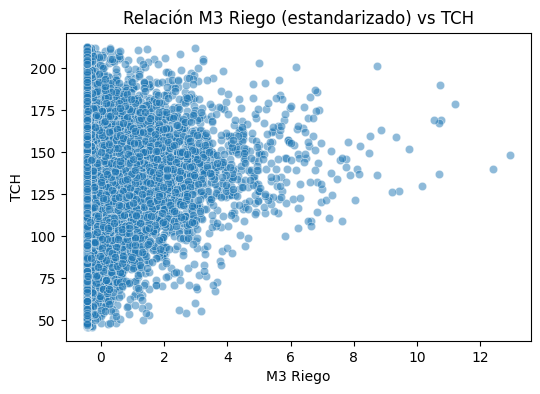

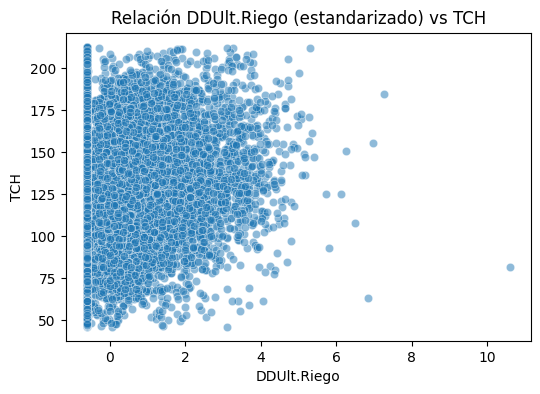

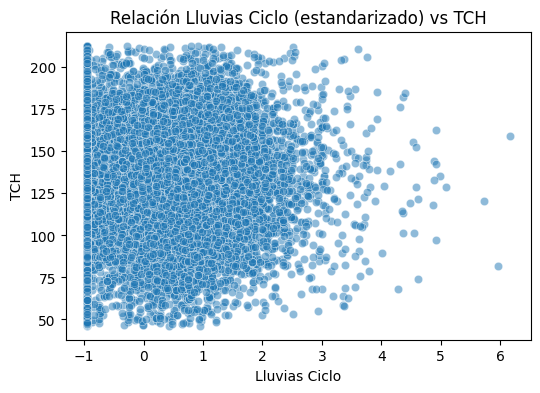

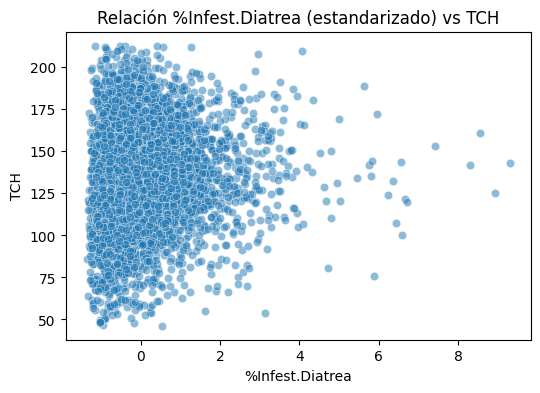

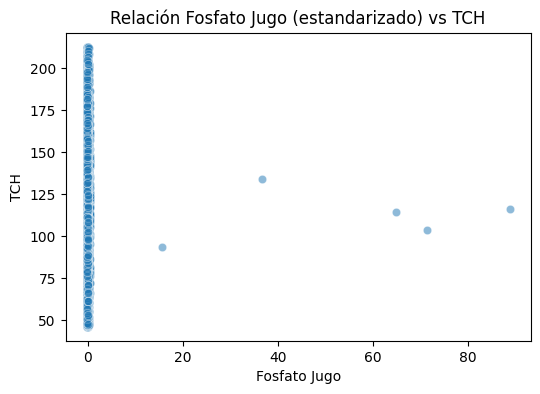

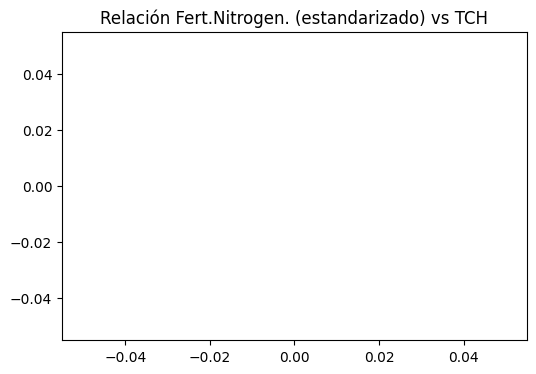

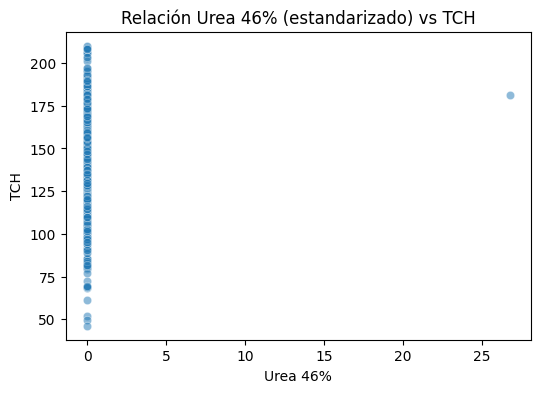

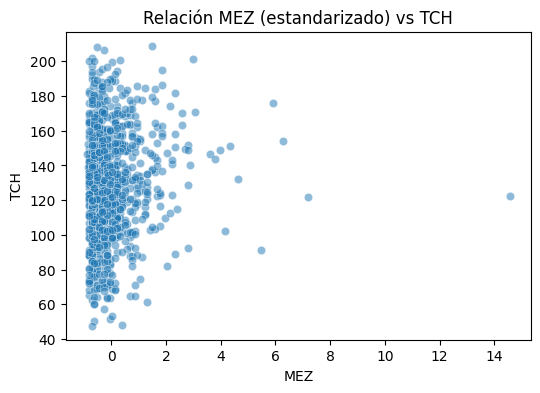

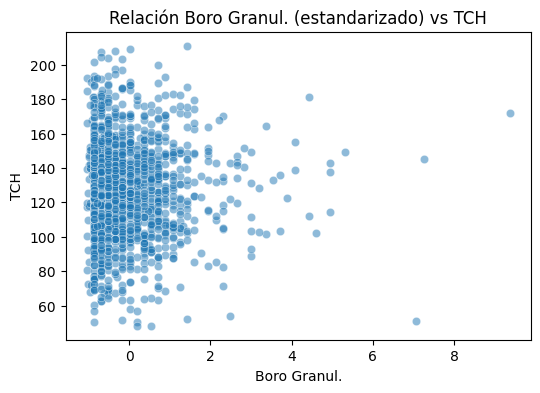

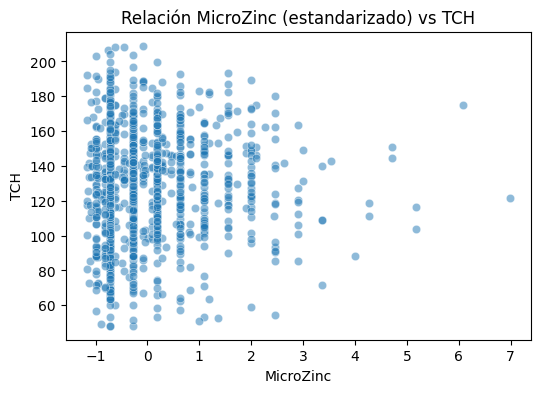

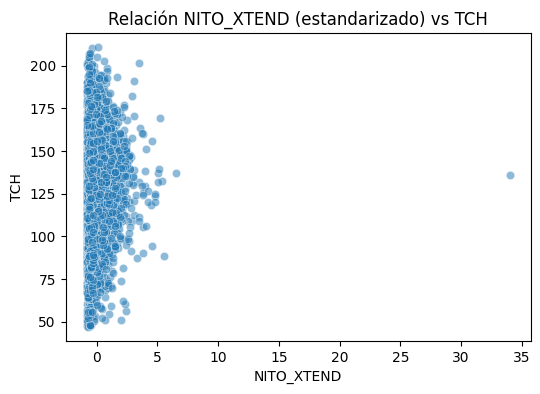

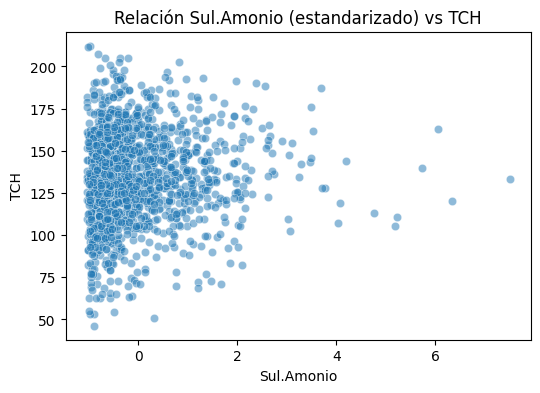

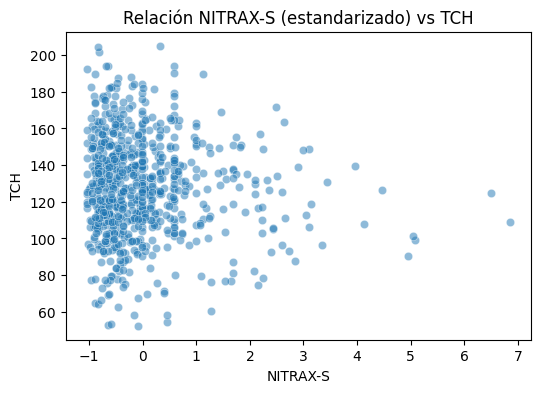

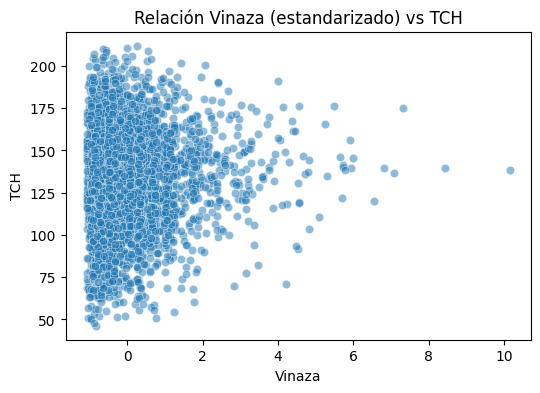

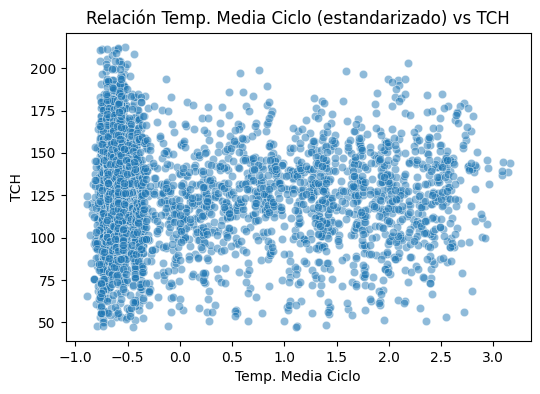

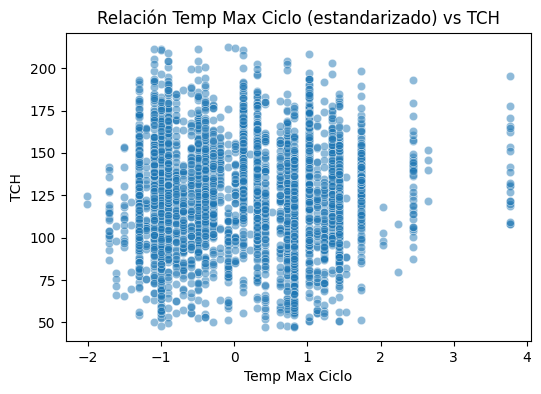

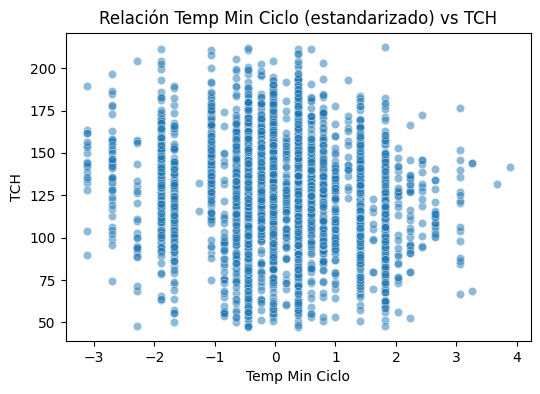

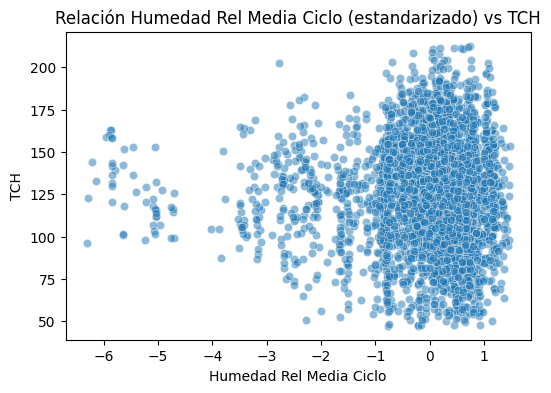

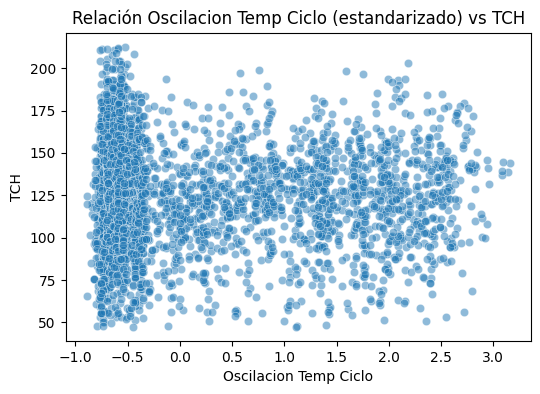

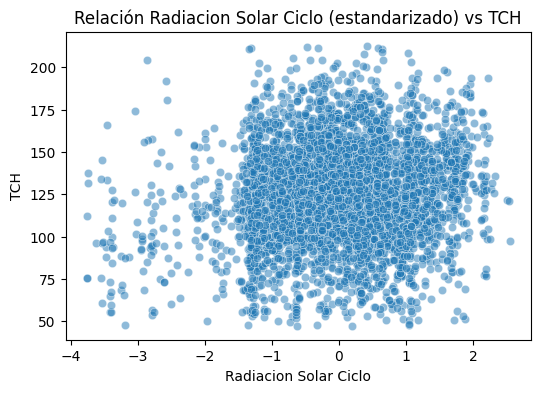

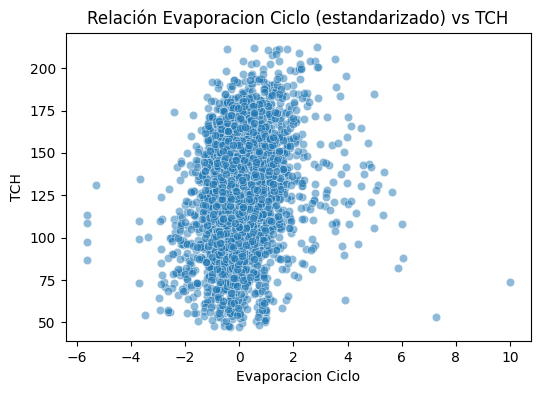

In [ ]:
from sklearn.preprocessing import StandardScaler
numericas = df_filtered.select_dtypes(include='number').columns

numericas_sin_tch = [col for col in numericas if col != 'TCH']

scaler = StandardScaler()
df_scaled = df_filtered.copy()
df_scaled[numericas_sin_tch] = scaler.fit_transform(df_filtered[numericas_sin_tch])

for col in numericas_sin_tch:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_scaled[col], y=df_scaled['TCH'], alpha=0.5)
    plt.title(f"Relación {col} (estandarizado) vs TCH")
    plt.show()

#### **Porcentaje de Nulos**

In [30]:
null_percent = df_sin_outliers.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Fert.Nitrogen.             100.000000
Urea 46%                    96.544902
NITRAX-S                    96.414612
MEZ                         95.367466
MicroZinc                   94.508517
Boro Granul.                93.871544
Sul.Amonio                  93.490325
NITO_XTEND                  82.396371
Vinaza                      80.384114
Radiacion Solar Ciclo       78.395985
Oscilacion Temp Ciclo       78.395985
Evaporacion Ciclo           78.395985
Humedad Rel Media Ciclo     78.395985
Temp Max Ciclo              78.395985
Temp Min Ciclo              78.395985
Temp. Media Ciclo           78.395985
%Infest.Diatrea             73.208512
Codigo Estacion             70.042947
D.S.                        65.796458
Num.Riegos                  59.764513
Edad.Precosecha             57.588187
Producto                    46.055108
Semanas mad.                46.040631
Fec.Madur.                  46.040631
Vejez                       11.533079
Fosfato Jugo                 8.743908
Dosis Madura

In [23]:
PRODUCTS_FEATURES = ['Fert.Nitrogen.', 'Urea 46%', 'NITRAX-S', 'MEZ', 'MicroZinc', 'Boro Granul.', 'Sul.Amonio', 'NITO_XTEND', 'Vinaza']
df_sin_outliers = df_sin_outliers.drop(columns = PRODUCTS_FEATURES)

In [24]:
df_sin_outliers = df_sin_outliers.drop(columns=WEATHERING_FEATURES)

In [25]:
df_sin_outliers['%Infest.Diatrea'] = df_sin_outliers['%Infest.Diatrea'].fillna(0)

In [26]:
df_sin_outliers = df_sin_outliers.drop(columns = ['Codigo Estacion'])

In [27]:
df_sin_outliers = df_sin_outliers.drop(columns = ['D.S.'])

In [28]:
df_sin_outliers = df_sin_outliers[df_sin_outliers["Num.Riegos"].notna()]

In [29]:
null_percent = df_sin_outliers.isnull().mean() * 100
null_percent.sort_values(ascending=False).head(50)

Edad.Precosecha      48.680739
Producto             34.000959
Semanas mad.         33.988966
Fec.Madur.           33.988966
Vejez                10.242264
Fosfato Jugo          7.088031
Dosis Madurante       0.455745
Dist Km               0.023987
Area Neta             0.000000
Tenencia              0.000000
Zona                  0.000000
Cultivo               0.000000
Cod. T.Cultivo        0.000000
Destino 1=Semilla     0.000000
F.Ult.Corte           0.000000
Edad Ult Cos          0.000000
Cod.Estado #          0.000000
Variedad              0.000000
TCH                   0.000000
Tipo Quema            0.000000
T.Corte               0.000000
Num.Riegos            0.000000
Cosechó               0.000000
M3 Riego              0.000000
DDUlt.Riego           0.000000
Lluvias Ciclo         0.000000
%Infest.Diatrea       0.000000
dtype: float64

In [30]:
df_sin_outliers = df_sin_outliers.drop(columns = ['Edad.Precosecha'])

In [31]:
df_sin_outliers = df_sin_outliers.drop(columns = ['Fosfato Jugo'])

In [32]:
df_sin_outliers = df_sin_outliers.drop(columns = ['Zona'])

In [33]:
df_sin_outliers = df_sin_outliers.drop(columns = ['F.Ult.Corte'])

In [42]:
df_sin_outliers = df_sin_outliers.drop(columns = ['Cosechó'])

In [34]:
df_sin_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8338 entries, 2 to 21026
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Tenencia           8338 non-null   float64       
 1   Area Neta          8338 non-null   float64       
 2   Dist Km            8336 non-null   float64       
 3   Variedad           8338 non-null   object        
 4   Cod.Estado #       8338 non-null   int64         
 5   Edad Ult Cos       8338 non-null   float64       
 6   Destino 1=Semilla  8338 non-null   int64         
 7   Cod. T.Cultivo     8338 non-null   float64       
 8   Cultivo            8338 non-null   object        
 9   Fec.Madur.         5504 non-null   datetime64[ns]
 10  Producto           5503 non-null   object        
 11  Dosis Madurante    8300 non-null   float64       
 12  Semanas mad.       5504 non-null   float64       
 13  TCH                8338 non-null   float64       
 14  Vejez       

In [43]:
umbral = 100  
variedad_comunes = df_sin_outliers['Variedad'].value_counts()[df_sin_outliers['Variedad'].value_counts() >= umbral].index
df_sin_outliers['Variedad'] = df_sin_outliers['Variedad'].apply(lambda x: x if x in variedad_comunes else "Otros")

In [44]:
df_sin_outliers['Variedad'].value_counts()

Variedad
CC01-1940    3532
CC05-430     1124
CC85-92      1065
Otros         689
CC93-4418     466
RB73-2223     392
CC97-7170     178
CC09-535      156
VARIAS        154
CC93-4181     127
CC00-3257     122
CC01-1228     114
CC04-195      110
CC09-066      109
Name: count, dtype: int64

In [37]:
df_sin_outliers.shape

(8338, 23)

--- 
#### **Evaluación y preprocesamiento General**

In [45]:
from sklearn.model_selection import train_test_split

X = df_sin_outliers.drop(['TCH'], axis = 1)
y = df_sin_outliers['TCH']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)


#### **Regresión Lineal**

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV


numerical_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include='object').columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),   
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

cv_scores_lr_mse = -cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_lr_r2 = cross_val_score(pipeline_lr, X_train, y_train, cv=5, scoring='r2')

print("--- Regresión Lineal Múltiple (Validación Cruzada) ---")
print(f"MSE promedio: {np.mean(cv_scores_lr_mse):.4f} (+/- {np.std(cv_scores_lr_mse):.4f})")
print(f"R^2 promedio: {np.mean(cv_scores_lr_r2):.4f} (+/- {np.std(cv_scores_lr_r2):.4f})")


--- Regresión Lineal Múltiple (Validación Cruzada) ---
MSE promedio: 650.2050 (+/- 54.7808)
R^2 promedio: 0.2450 (+/- 0.0519)


In [47]:
# Pipeline para Ridge
pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Ridge())])

# Pipeline para Lasso
pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('regressor', Lasso())])

# Definir el rango de alphas para probar
param_grid = {'regressor__alpha': np.logspace(-4, 2, 100)}

# GridSearch para Ridge
grid_search_ridge = GridSearchCV(pipeline_ridge, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# GridSearch para Lasso
grid_search_lasso = GridSearchCV(pipeline_lasso, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

print(f"\n--- Ridge (L2) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_ridge.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_ridge.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_ridge.best_estimator_.score(X_train, y_train):.4f}")

print(f"\n--- Lasso (L1) con GridSearchCV ---")
print(f"Mejor alpha: {grid_search_lasso.best_params_['regressor__alpha']:.4f}")
print(f"Mejor MSE (CV): {-grid_search_lasso.best_score_:.4f}")
print(f"Mejor R² (CV): {grid_search_lasso.best_estimator_.score(X_train, y_train):.4f}")


--- Ridge (L2) con GridSearchCV ---
Mejor alpha: 9.3260
Mejor MSE (CV): 649.5764
Mejor R² (CV): 0.2739

--- Lasso (L1) con GridSearchCV ---
Mejor alpha: 0.0231
Mejor MSE (CV): 649.4929
Mejor R² (CV): 0.2728



--- Características más importantes según Lasso ---
                                      Característica  Coeficiente   abs_coef
20                            cat__Variedad_CC09-066    26.376496  26.376496
48                              cat__Producto_baykal   -22.705188  22.705188
61                                 cat__Cosechó_0010   -20.464302  20.464302
19                            cat__Variedad_CC05-430    17.593476  17.593476
33  cat__Producto_BONUS 250 EC REGULADOR FISIOLOGICO   -14.887534  14.887534
17                           cat__Variedad_CC01-1940    10.550741  10.550741
56                              cat__T.Corte_NO DEF.     9.320688   9.320688
22                             cat__Variedad_CC85-92    -9.095148   9.095148
63                                 cat__Cosechó_2000     8.589810   8.589810
4                                  num__Edad Ult Cos     8.272313   8.272313
24                           cat__Variedad_CC93-4418    -7.862589   7.862589
16                     

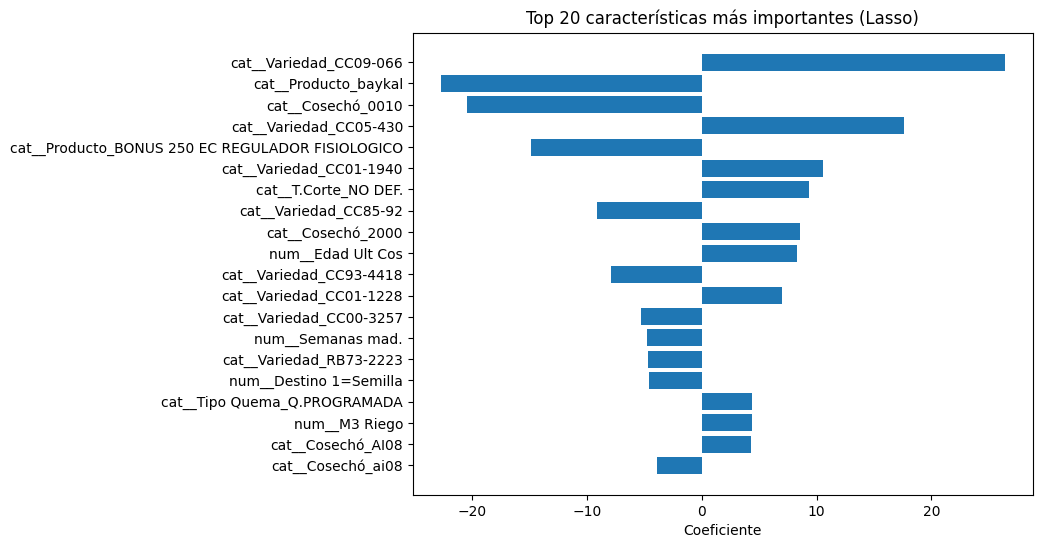


--- Características más influyentes según Ridge ---
                                      Característica  Coeficiente   abs_coef
20                            cat__Variedad_CC09-066    22.665963  22.665963
48                              cat__Producto_baykal   -15.880444  15.880444
19                            cat__Variedad_CC05-430    14.986703  14.986703
61                                 cat__Cosechó_0010   -14.696409  14.696409
33  cat__Producto_BONUS 250 EC REGULADOR FISIOLOGICO   -12.133570  12.133570
22                             cat__Variedad_CC85-92   -11.523292  11.523292
24                           cat__Variedad_CC93-4418   -10.346830  10.346830
63                                 cat__Cosechó_2000    10.108610  10.108610
56                              cat__T.Corte_NO DEF.     9.104355   9.104355
4                                  num__Edad Ult Cos     8.260207   8.260207
17                           cat__Variedad_CC01-1940     7.999272   7.999272
15                     

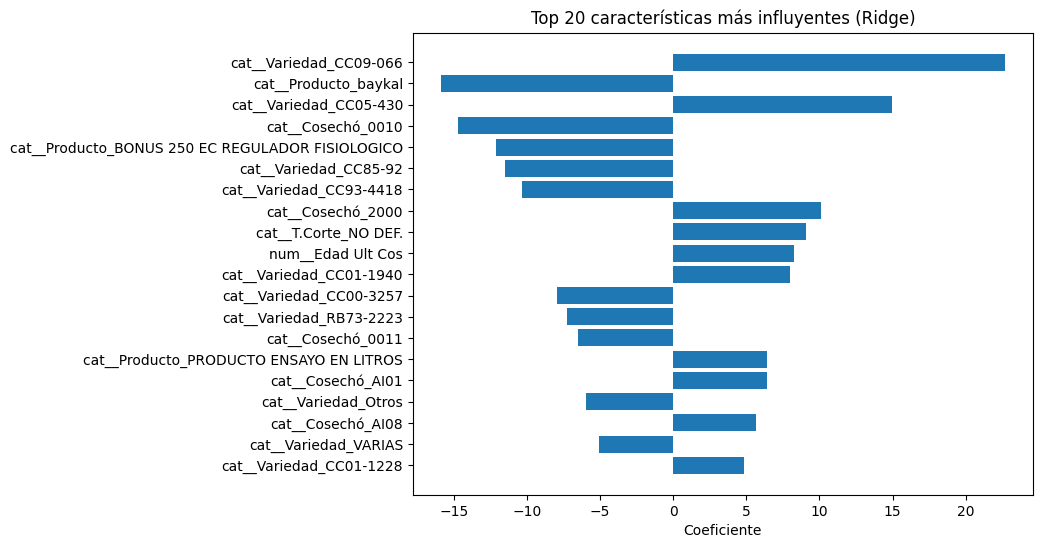

In [41]:
best_lasso_model = grid_search_lasso.best_estimator_
lasso_feature_names = best_lasso_model.named_steps['preprocessor'].get_feature_names_out()
lasso_coeffs = best_lasso_model.named_steps['regressor'].coef_

df_lasso = pd.DataFrame({
    'Característica': lasso_feature_names,
    'Coeficiente': lasso_coeffs
})

# Filtramos las que Lasso mantuvo (coef != 0)
significant_lasso = df_lasso[df_lasso['Coeficiente'] != 0] \
    .assign(abs_coef=lambda d: d['Coeficiente'].abs()) \
    .sort_values(by='abs_coef', ascending=False)

print("\n--- Características más importantes según Lasso ---")
print(significant_lasso.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(significant_lasso.head(20)['Característica'],
         significant_lasso.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más importantes (Lasso)")
plt.xlabel("Coeficiente")
plt.show()


# --- Ridge ---
best_ridge_model = grid_search_ridge.best_estimator_
ridge_feature_names = best_ridge_model.named_steps['preprocessor'].get_feature_names_out()
ridge_coeffs = best_ridge_model.named_steps['regressor'].coef_

df_ridge = pd.DataFrame({
    'Característica': ridge_feature_names,
    'Coeficiente': ridge_coeffs,
    'abs_coef': abs(ridge_coeffs)
}).sort_values(by='abs_coef', ascending=False)

print("\n--- Características más influyentes según Ridge ---")
print(df_ridge.head(20))

# Gráfico
plt.figure(figsize=(8, 6))
plt.barh(df_ridge.head(20)['Característica'],
         df_ridge.head(20)['Coeficiente'])
plt.gca().invert_yaxis()
plt.title("Top 20 características más influyentes (Ridge)")
plt.xlabel("Coeficiente")
plt.show()